<a href="https://colab.research.google.com/github/AyodejiIbimilua/the-great-indian-hiring-hackathon/blob/main/hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install catboost

     |████████████████████████████████| 66.2MB 93kB/s 


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
train_link = "/content/drive/My Drive/Hackathons/The Great Indian Hiring Hackathon/Dataset/Train.csv"

In [ ]:
raw_train = pd.read_csv(train_link)

In [ ]:
raw_train

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35.0
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35.0
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35.0
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35.0
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35.0
...,...,...,...,...,...,...,...,...
169714,4088,1076,3313,12,2011-03-18 12:26:00,0.85,15483.0,35.0
169715,13424,2995,825,16,2011-10-05 15:17:00,0.65,14389.0,35.0
169716,12104,2122,1376,2,2011-09-13 15:37:00,1.65,15998.0,35.0
169717,15853,928,1248,2,2011-11-09 17:47:00,1.25,15531.0,35.0


In [ ]:
raw_train.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     1
Country        1
dtype: int64

In [ ]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169719 entries, 0 to 169718
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    169719 non-null  int64  
 1   StockCode    169719 non-null  int64  
 2   Description  169719 non-null  int64  
 3   Quantity     169719 non-null  int64  
 4   InvoiceDate  169719 non-null  object 
 5   UnitPrice    169719 non-null  float64
 6   CustomerID   169718 non-null  float64
 7   Country      169718 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 10.4+ MB


In [ ]:
raw_train.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,169719.000000,169719.000000,169719.000000,169719.000000,169719.000000,169718.000000,169718.000000
mean,9952.817976,1574.367348,2023.911171,12.415893,3.517202,15287.814504,32.820490
std,5553.404093,843.434147,1090.053952,187.160632,97.659763,1715.382371,6.745904
min,0.000000,0.000000,0.000000,-1930.000000,0.000000,12346.000000,0.000000
25%,5060.000000,942.000000,1143.000000,2.000000,1.250000,13952.000000,35.000000
50%,10306.000000,1524.000000,1986.000000,5.000000,1.950000,15150.000000,35.000000
75%,14657.000000,2106.000000,2947.000000,12.000000,3.750000,16795.000000,35.000000
max,22188.000000,3683.000000,3895.000000,74215.000000,38970.000000,18287.000000,36.000000


In [ ]:
np.unique(raw_train.Country)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., nan])

In [ ]:
len(np.unique(raw_train.CustomerID))

4274

In [ ]:
len(np.unique(raw_train.Description))

3679

In [ ]:
len(np.unique(raw_train.StockCode))

3506

In [ ]:
len(np.unique(raw_train.InvoiceNo))

19285

In [ ]:
len(np.unique(raw_train.InvoiceDate))

17996

In [ ]:
raw_train.dropna(inplace=True)

In [ ]:
raw_train['InvoiceDate'] = pd.to_datetime(raw_train.InvoiceDate)
raw_train["Year"] = raw_train.InvoiceDate.dt.year
raw_train["Month"] = raw_train.InvoiceDate.dt.month_name()
raw_train["Day"] = raw_train.InvoiceDate.dt.daysinmonth
raw_train["WeekDay"] = raw_train.InvoiceDate.dt.day_name()
raw_train["MonthEnd"] = raw_train.InvoiceDate.dt.is_year_end
raw_train["YearEnd"] = raw_train.InvoiceDate.dt.is_month_end

In [ ]:
raw_train

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,WeekDay,MonthEnd,YearEnd
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35.0,2011,May,31,Friday,False,False
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35.0,2011,May,31,Wednesday,False,False
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35.0,2011,November,30,Sunday,False,False
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35.0,2011,November,30,Tuesday,False,False
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35.0,2011,May,31,Friday,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169713,18485,1084,865,324,2011-12-08 18:43:00,3.39,18102.0,35.0,2011,December,31,Thursday,False,False
169714,4088,1076,3313,12,2011-03-18 12:26:00,0.85,15483.0,35.0,2011,March,31,Friday,False,False
169715,13424,2995,825,16,2011-10-05 15:17:00,0.65,14389.0,35.0,2011,October,31,Wednesday,False,False
169716,12104,2122,1376,2,2011-09-13 15:37:00,1.65,15998.0,35.0,2011,September,30,Tuesday,False,False


In [ ]:
use_cols = ["Quantity", "Country", "InvoiceNo",	"StockCode", "Description", "CustomerID", "Year", "Month", "Day", "WeekDay", "UnitPrice"]
train_data = raw_train[use_cols]

In [ ]:
train_data

,Quantity,Country,InvoiceNo,StockCode,Description,CustomerID,Year,Month,Day,WeekDay,UnitPrice
0,3,35.0,6141,1583,144,14056.0,2011,May,31,Friday,3.75
1,6,35.0,6349,1300,3682,13098.0,2011,May,31,Wednesday,1.95
2,4,35.0,16783,2178,1939,15044.0,2011,November,30,Sunday,5.95
3,1,35.0,16971,2115,2983,15525.0,2011,November,30,Tuesday,0.83
4,12,35.0,6080,1210,2886,13952.0,2011,May,31,Friday,1.65
...,...,...,...,...,...,...,...,...,...,...,...
169713,324,35.0,18485,1084,865,18102.0,2011,December,31,Thursday,3.39
169714,12,35.0,4088,1076,3313,15483.0,2011,March,31,Friday,0.85
169715,16,35.0,13424,2995,825,14389.0,2011,October,31,Wednesday,0.65
169716,2,35.0,12104,2122,1376,15998.0,2011,September,30,Tuesday,1.65


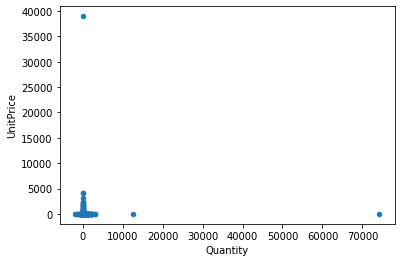

In [ ]:
train_data.plot.scatter(x="Quantity", y="UnitPrice")

In [ ]:
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

numeric_features = ["Quantity", "Country", "InvoiceNo",	"StockCode", "Description", "CustomerID"]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('pt', PowerTransformer(method='yeo-johnson', standardize=True,))])

categorical_features = ["Year", "Month", "Day", "WeekDay"]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='error', drop='first'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
from sklearn.decomposition import TruncatedSVD

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', CatBoostRegressor())])

In [ ]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [ ]:
y_pred = clf.predict(X_test)


In [ ]:

y_pred

array([1.2574, 8.1213, 3.75  , ..., 2.95  , 9.95  , 0.4712])

In [ ]:
y_test

35543     1.25
89209     5.95
115432    3.75
90599     1.65
12310     2.10
          ... 
13749     9.95
133883    2.10
146597    2.95
25385     9.95
116040    0.39
Name: UnitPrice, Length: 42430, dtype: float64

In [ ]:
mean_squared_error(y_test, y_pred)

670.6642753897834

In [ ]:
pipeline_lr = Pipeline([('preprocessor', preprocessor),
                     ('pca1',PCA(0.95)), 
                     ('lr_classifier',LogisticRegression())])
pipeline_dt = Pipeline([('preprocessor', preprocessor),
                     ('pca1',PCA(0.95)),
                     ('dt_classifier',DecisionTreeClassifier())])
pipeline_svm = Pipeline([('preprocessor', preprocessor),
                      ('pca1',PCA(0.95)),
                      ('clf', svm.SVC())])
pipeline_knn = Pipeline([('preprocessor', preprocessor),
                     ('pca1',PCA(0.95)),
                     ('knn_classifier',KNeighborsClassifier())])
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest, pipeline_knn]
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Support Vector Machine',3:'K Nearest Neighbor'}
for pipe in pipelines:
  pipe.fit(X_train, y_train)
for i,model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_test,y_test)))